The purpose of this notebook is to create a credit scoring model that is able to predict whether a client will be able to pay out his loan or not. 

Data description:

- client_id
- education
- sex
- age
- car
- car_type
- decline_app_cnt
- good_work
- bki_request_cnt
- home_address
- work_address
- income
- foreign_passport
- sna
- first_time
- score_bki
- region_rating
- app_date
- default


Notebook content:

1. Data import
2. Cleaning and preparing the data
3. EDA
4. Data preprocessing
5. Model
6. Submission

# 1. Data Import

In [2]:
# importing libraries

from pandas import Series
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


from sklearn.feature_selection import f_classif, mutual_info_classif
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler, PolynomialFeatures
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, auc, roc_auc_score, roc_curve, accuracy_score, recall_score, f1_score, precision_score

In [3]:
# importing data
path = '/kaggle/input/sfdstcreditscoring/'
import os
for dirname, _, filenames in os.walk('../input/sfdstcreditscoring'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

../input/sfdstcreditscoring/sample_submission.csv
../input/sfdstcreditscoring/train.csv/train.csv
../input/sfdstcreditscoring/test.csv/test.csv


In [4]:
test= pd.read_csv('/kaggle/input/sfdstcreditscoring/test.csv/test.csv')
train = pd.read_csv('/kaggle/input/sfdstcreditscoring/train.csv/train.csv')

# 2. Cleaning and preparing the data

In [5]:
test.head()

,client_id,app_date,education,sex,age,car,car_type,decline_app_cnt,good_work,score_bki,bki_request_cnt,region_rating,home_address,work_address,income,sna,first_time,foreign_passport
0,74835,22MAR2014,GRD,M,29,Y,Y,0,0,-2.271884,3,50,1,2,50000,1,4,N
1,17527,24JAN2014,SCH,F,39,N,N,5,0,-1.504999,2,50,1,2,5000,4,3,N
2,75683,23MAR2014,UGR,M,50,Y,Y,0,0,-1.691339,1,50,1,2,30000,1,3,Y
3,26883,03FEB2014,SCH,M,56,N,N,0,0,-2.374182,1,40,1,2,17000,1,3,N
4,28862,04FEB2014,GRD,F,38,N,N,0,0,-2.487502,0,80,2,3,120000,1,3,N


In [6]:
train.head()

,client_id,app_date,education,sex,age,car,car_type,decline_app_cnt,good_work,score_bki,bki_request_cnt,region_rating,home_address,work_address,income,sna,first_time,foreign_passport,default
0,25905,01FEB2014,SCH,M,62,Y,Y,0,0,-2.008753,1,50,1,2,18000,4,1,N,0
1,63161,12MAR2014,SCH,F,59,N,N,0,0,-1.532276,3,50,2,3,19000,4,1,N,0
2,25887,01FEB2014,SCH,M,25,Y,N,2,0,-1.408142,1,80,1,2,30000,1,4,Y,0
3,16222,23JAN2014,SCH,F,53,N,N,0,0,-2.057471,2,50,2,3,10000,1,3,N,0
4,101655,18APR2014,GRD,M,48,N,N,0,1,-1.244723,1,60,2,3,30000,1,4,Y,0


### 2.1 Checking for data gaps and NAs:

In [7]:
test.isnull().sum()

client_id             0
app_date              0
education           171
sex                   0
age                   0
car                   0
car_type              0
decline_app_cnt       0
good_work             0
score_bki             0
bki_request_cnt       0
region_rating         0
home_address          0
work_address          0
income                0
sna                   0
first_time            0
foreign_passport      0
dtype: int64

In [8]:
train.isnull().sum()

client_id             0
app_date              0
education           307
sex                   0
age                   0
car                   0
car_type              0
decline_app_cnt       0
good_work             0
score_bki             0
bki_request_cnt       0
region_rating         0
home_address          0
work_address          0
income                0
sna                   0
first_time            0
foreign_passport      0
default               0
dtype: int64

(<AxesSubplot:>, <AxesSubplot:>)

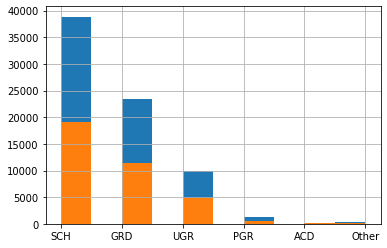

In [9]:
# filling Null values with "Other" label

train.education = train.education.fillna("Other")
test.education = test.education.fillna("Other")
train.education.hist(), test.education.hist()

### 2.2 Transforming date values

In [10]:
# transforming app_date column to date format

train.app_date = pd.to_datetime(train.app_date)
test.app_date = pd.to_datetime(train.app_date)

In [11]:
train.head(5)

,client_id,app_date,education,sex,age,car,car_type,decline_app_cnt,good_work,score_bki,bki_request_cnt,region_rating,home_address,work_address,income,sna,first_time,foreign_passport,default
0,25905,2014-02-01,SCH,M,62,Y,Y,0,0,-2.008753,1,50,1,2,18000,4,1,N,0
1,63161,2014-03-12,SCH,F,59,N,N,0,0,-1.532276,3,50,2,3,19000,4,1,N,0
2,25887,2014-02-01,SCH,M,25,Y,N,2,0,-1.408142,1,80,1,2,30000,1,4,Y,0
3,16222,2014-01-23,SCH,F,53,N,N,0,0,-2.057471,2,50,2,3,10000,1,3,N,0
4,101655,2014-04-18,GRD,M,48,N,N,0,1,-1.244723,1,60,2,3,30000,1,4,Y,0


# 3. EDA

### 3.1 default parameter

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='default', ylabel='count'>

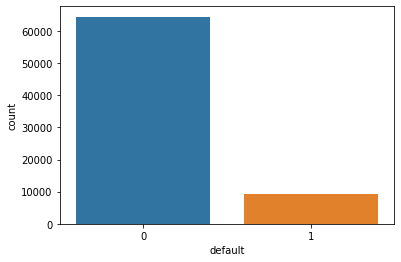

In [12]:
sns.countplot(train['default'])

In [13]:
train.default.value_counts()

0    64427
1     9372
Name: default, dtype: int64

CONCLUSION: default parameter is not balanced. Potentially we could try an approach to teach the model only on the balanced dataset.

In [14]:
# creating a reduced dataset:

train_default_1 = train[train.default == 1]
train_default_0 = train[train.default == 0].head(9372)
train_reduced = train_default_1.append(train_default_0,sort = False).reset_index(drop=True)
train_reduced.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18744 entries, 0 to 18743
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   client_id         18744 non-null  int64         
 1   app_date          18744 non-null  datetime64[ns]
 2   education         18744 non-null  object        
 3   sex               18744 non-null  object        
 4   age               18744 non-null  int64         
 5   car               18744 non-null  object        
 6   car_type          18744 non-null  object        
 7   decline_app_cnt   18744 non-null  int64         
 8   good_work         18744 non-null  int64         
 9   score_bki         18744 non-null  float64       
 10  bki_request_cnt   18744 non-null  int64         
 11  region_rating     18744 non-null  int64         
 12  home_address      18744 non-null  int64         
 13  work_address      18744 non-null  int64         
 14  income            1874

### 3.2 Correlations

<AxesSubplot:>

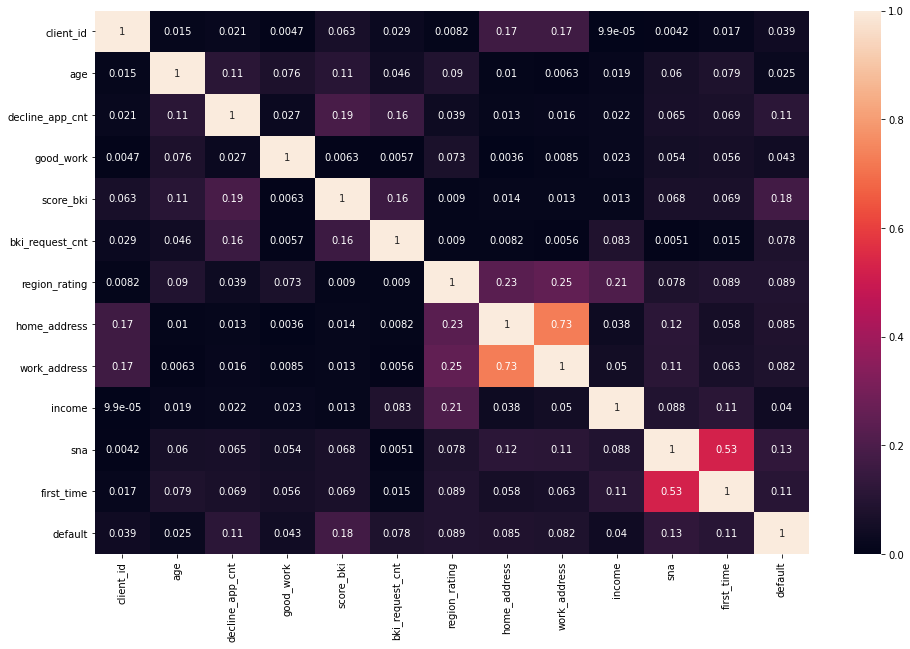

In [15]:
plt.figure(figsize=(16,10))
sns.heatmap(train.corr().abs(), vmin=0, vmax=1, annot=True)

CONCLUSION: checking for multicollinearity, we see that:
- there are no extreme correlations
- there is correlation between variables *car* and *car_type*
- there is correlation between variables *home_address* and *work_address*

*car_type* has a stronger connection to *default* parameter, so we can leave out the *car* variable.
*home_addresa* has a stronger connection to *default* parameter, so we can leave out the *work_address* variable.

<AxesSubplot:>

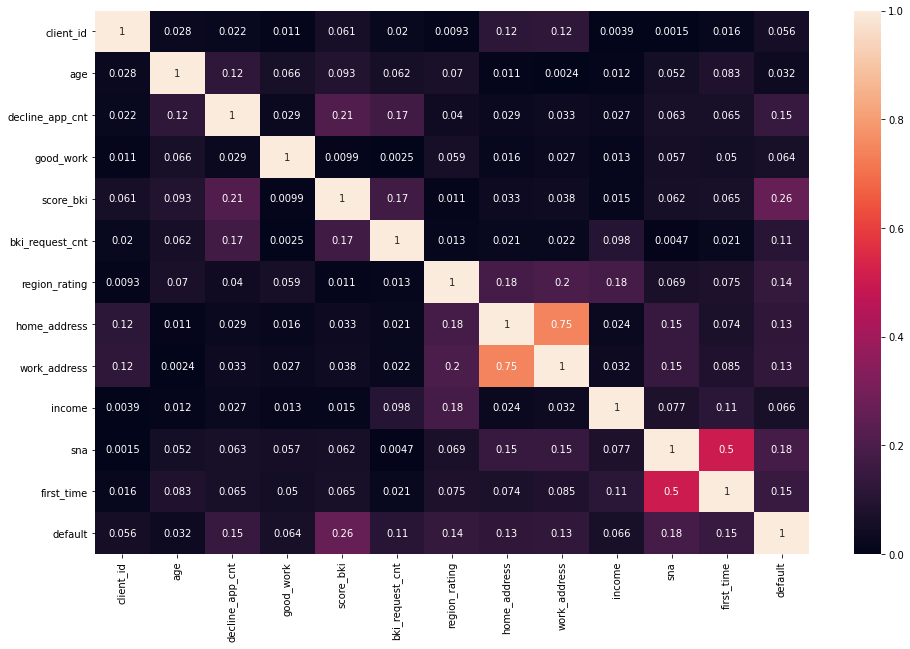

In [16]:
plt.figure(figsize=(16,10))
sns.heatmap(train_reduced.corr().abs(), vmin=0, vmax=1, annot=True)

In [17]:
bin_cols = ['sex', 'car_type', 'good_work', 'foreign_passport']
cat_cols = ['education', 'home_address', 'sna', 'first_time']
num_cols = ['age', 'decline_app_cnt', 'score_bki', 'bki_request_cnt', 'region_rating', 'income']

### 3.3 Numeric variables

<AxesSubplot:>

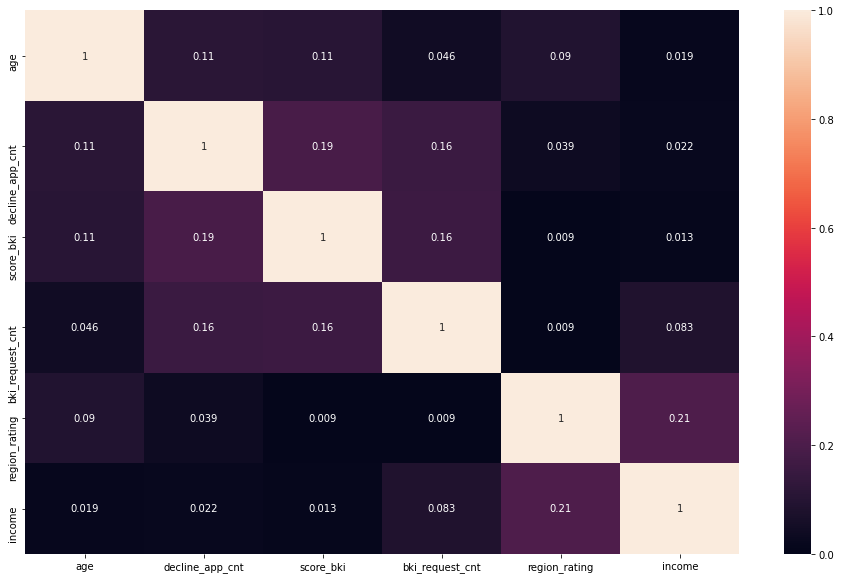

In [18]:
plt.figure(figsize=(16,10))
sns.heatmap(train[num_cols].corr().abs(), vmin=0, vmax=1, annot=True)

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


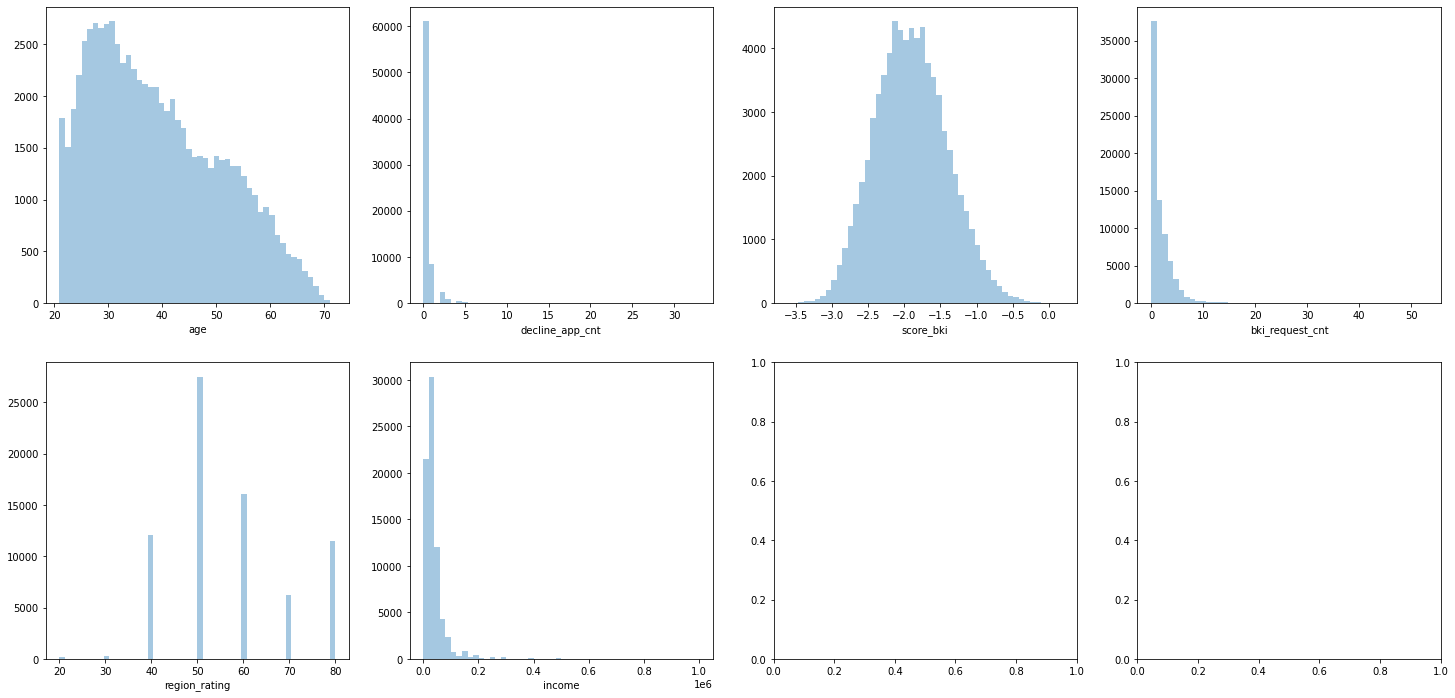

In [19]:
fig, axes = plt.subplots(2, 4, figsize=(25,12))
for col, i in zip(num_cols, range(7)):
    sns.distplot(train[col], kde=False, ax=axes.flat[i])

NOTE: some of the numeric variables are having a considerable long tail, which we want to get rid of by using the logarithm function.

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


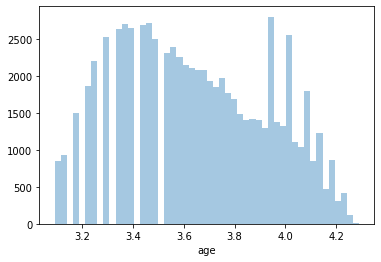

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


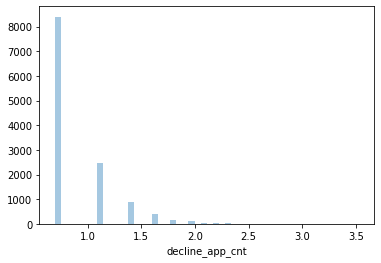

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


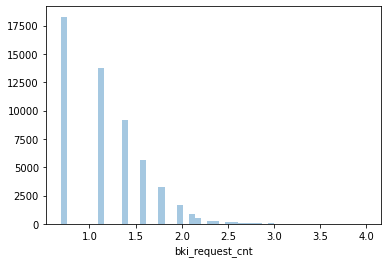

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


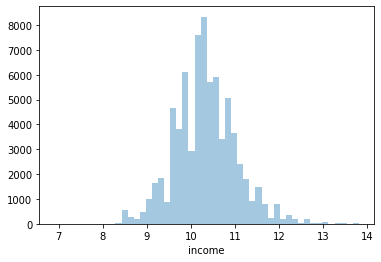

In [20]:
num_cols_log = ['age', 'decline_app_cnt', 'bki_request_cnt', 'income']
for i in num_cols_log:
    train[i] = np.log(train[i] + 1)
    plt.figure()
    sns.distplot(train[i][train[i] > 0].dropna(), kde = False, rug=False)
    plt.show()

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


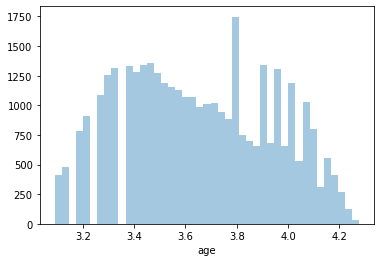

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


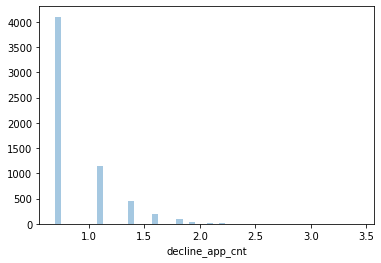

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


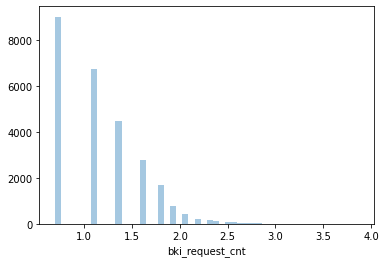

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


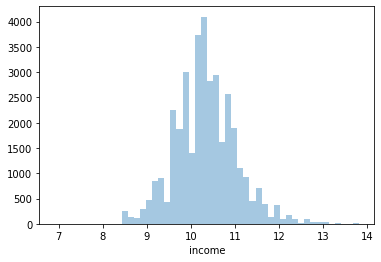

In [21]:
for i in num_cols_log:
    test[i] = np.log(test[i] + 1)
    plt.figure()
    sns.distplot(test[i][test[i] > 0].dropna(), kde = False, rug=False)
    plt.show()

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


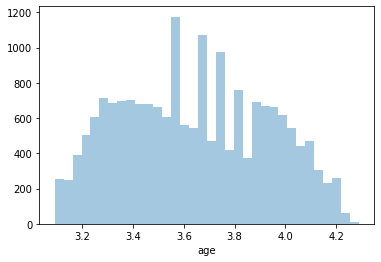

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


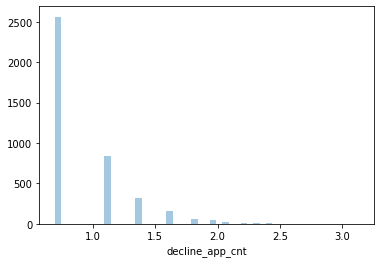

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


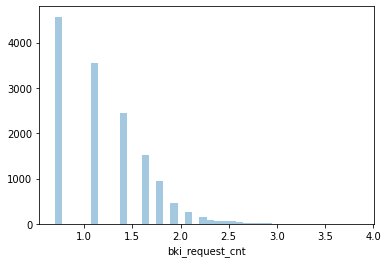

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


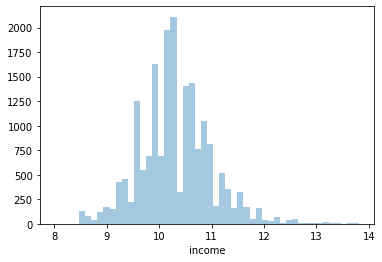

In [22]:
for i in num_cols_log:
    train_reduced[i] = np.log(train_reduced[i] + 1)
    plt.figure()
    sns.distplot(train_reduced[i][train_reduced[i] > 0].dropna(), kde = False, rug=False)
    plt.show()

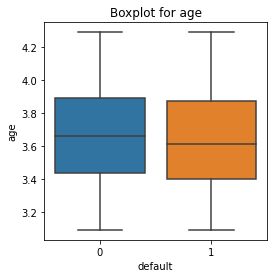

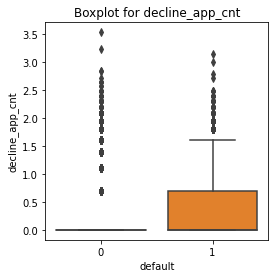

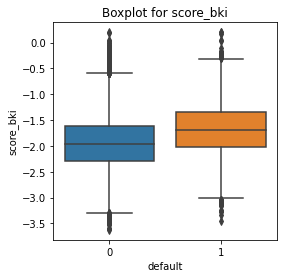

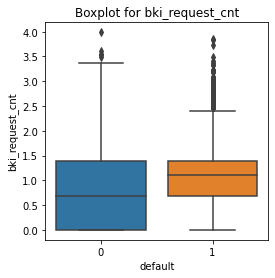

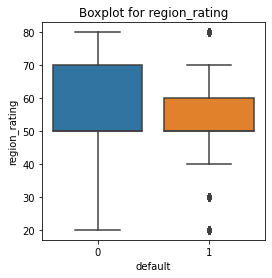

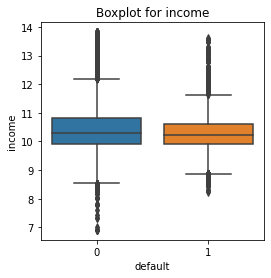

In [23]:
def boxplot(col):
    fig, axes = plt.subplots(figsize = (4, 4))
    sns.boxplot(x='default', y=col, data=train,ax=axes)
    axes.set_title('Boxplot for ' + col)
    plt.show()
for col in num_cols:
    boxplot(col)

CONCLUSIONS:
* default clients tend to be younger, have higher count of previous applications as well as declined applications, have higher score in bki system(??), live in "lower" region category, and are almost the same as non-default clients in terms of income.

Text(0.5, 0, 'F-value')

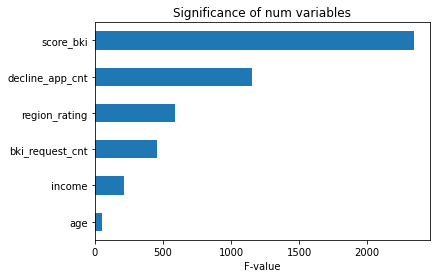

In [24]:
# Significance of numeric variables:

imp_num = Series(f_classif(train[num_cols], train['default'])[0], index = num_cols)
imp_num.sort_values(inplace = True)
imp_num.plot(kind = 'barh')
plt.title('Significance of num variables')
plt.xlabel('F-value')

CONCLUSIONS: *score_bki* and *decline_app_count* are the most significant variables, age seems to be irrelevant. Income apparently has almost no impact at all, which is strange.

Text(0.5, 0, 'F-value')

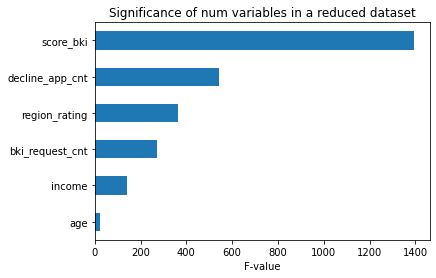

In [25]:
# Significance of numeric variables in a reduced dataset:

imp_num = Series(f_classif(train_reduced[num_cols], train_reduced['default'])[0], index = num_cols)
imp_num.sort_values(inplace = True)
imp_num.plot(kind = 'barh')
plt.title('Significance of num variables in a reduced dataset')
plt.xlabel('F-value')

CONCLUSION: the order of significance stays for the reduced dataset same, however the overall F-value decreases.

### 3.4 Binary variables

In [26]:
label_encoder = LabelEncoder()

for column in bin_cols:
    train[column] = label_encoder.fit_transform(train[column])
    test[column] = label_encoder.fit_transform(test[column])
    train_reduced[column] = label_encoder.fit_transform(train_reduced[column])

In [27]:
train.head()

,client_id,app_date,education,sex,age,car,car_type,decline_app_cnt,good_work,score_bki,bki_request_cnt,region_rating,home_address,work_address,income,sna,first_time,foreign_passport,default
0,25905,2014-02-01,SCH,1,4.143135,Y,1,0.000000,0,-2.008753,0.693147,50,1,2,9.798183,4,1,0,0
1,63161,2014-03-12,SCH,0,4.094345,N,0,0.000000,0,-1.532276,1.386294,50,2,3,9.852247,4,1,0,0
2,25887,2014-02-01,SCH,1,3.258097,Y,0,1.098612,0,-1.408142,0.693147,80,1,2,10.308986,1,4,1,0
3,16222,2014-01-23,SCH,0,3.988984,N,0,0.000000,0,-2.057471,1.098612,50,2,3,9.210440,1,3,0,0
4,101655,2014-04-18,GRD,1,3.891820,N,0,0.000000,1,-1.244723,0.693147,60,2,3,10.308986,1,4,1,0


Text(0.5, 1.0, 'Significance of binary variables')

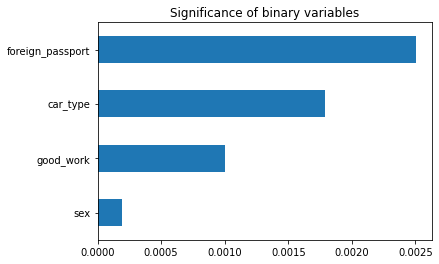

In [28]:
# Significance of binary variables:

imp_bin = Series(mutual_info_classif(train[bin_cols], train['default'],
                                     discrete_features =True), index = bin_cols)
imp_bin.sort_values(inplace = True)
imp_bin.plot(kind = 'barh')
plt.title('Significance of binary variables')

CONCLUSION: most important binary variable seems to be *foreign_passport* and *car_type*, whereas *sex* has almost no impact. 

Text(0.5, 1.0, 'Significance of binary variables in a reduced dataset')

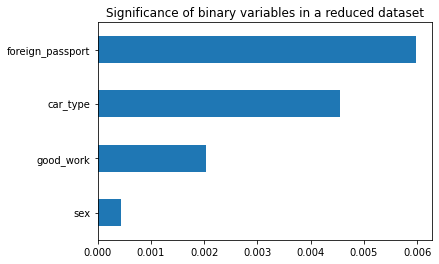

In [29]:
# Significance of binary variables in a reduced dataset:

imp_bin = Series(mutual_info_classif(train_reduced[bin_cols], train_reduced['default'],
                                     discrete_features =True), index = bin_cols)
imp_bin.sort_values(inplace = True)
imp_bin.plot(kind = 'barh')
plt.title('Significance of binary variables in a reduced dataset')

CONCLUSION: order of variables stays the same, the significance level of binary variables overall increases.

### 3.5 Cateogrical variables

In [30]:
x_cat = OneHotEncoder(sparse = False).fit_transform(train[cat_cols].values)
y_cat = OneHotEncoder(sparse = False).fit_transform(test[cat_cols].values)
z_cat = OneHotEncoder(sparse = False).fit_transform(train_reduced[cat_cols].values)
education_transposed = pd.get_dummies(train['education'])

In [31]:
x_cat.shape

(73799, 17)

In [32]:
y_cat.shape

(36349, 17)

Text(0.5, 1.0, 'Significance of categorical variables')

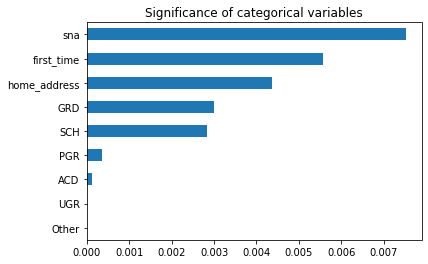

In [33]:
# Significance of categorical variables:

cat_cols_upd = ['home_address', 'sna', 'first_time']
imp_cat = pd.Series(mutual_info_classif(pd.concat([train[cat_cols_upd], education_transposed], axis=1),
                                        train['default'], discrete_features =True),
                    index = pd.concat([train[cat_cols_upd], education_transposed], axis=1).columns)
imp_cat.sort_values(inplace = True)
imp_cat.plot(kind = 'barh')
plt.title('Significance of categorical variables')

CONCLUSION: *sna*, *first_time* and *home_address* variables seem to have the highest impact on the target parameter. 

Text(0.5, 1.0, 'Significance of categorical variables in a reduced dataset')

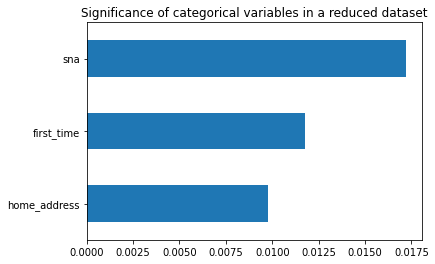

In [34]:
# Significance of categorical variables in a reduced dataset:

cat_cols_upd = ['home_address', 'sna', 'first_time']
imp_cat = pd.Series(mutual_info_classif(pd.concat([train_reduced[cat_cols_upd]], axis=1),
                                        train_reduced['default'], discrete_features =True),
                    index = pd.concat([train_reduced[cat_cols_upd]], axis=1).columns)
imp_cat.sort_values(inplace = True)
imp_cat.plot(kind = 'barh')
plt.title('Significance of categorical variables in a reduced dataset')

CONCLUSION: order of significanse for categorical variables stays, the overall importance changes.

# 4. Data Preprocessing

In [35]:
polynomial = PolynomialFeatures(2)

x_train = polynomial.fit_transform(train[num_cols].values)
y_test = polynomial.fit_transform(test[num_cols].values)
z_train = polynomial.fit_transform(train_reduced[num_cols].values)

In [36]:
x_train

array([[1.00000000e+00, 4.14313473e+00, 0.00000000e+00, ...,
        2.50000000e+03, 4.89909130e+02, 9.60043821e+01],
       [1.00000000e+00, 4.09434456e+00, 0.00000000e+00, ...,
        2.50000000e+03, 4.92612344e+02, 9.70667687e+01],
       [1.00000000e+00, 3.25809654e+00, 1.09861229e+00, ...,
        6.40000000e+03, 8.24718879e+02, 1.06275192e+02],
       ...,
       [1.00000000e+00, 3.46573590e+00, 0.00000000e+00, ...,
        6.40000000e+03, 8.57155199e+02, 1.14799224e+02],
       [1.00000000e+00, 3.40119738e+00, 0.00000000e+00, ...,
        2.50000000e+03, 4.73639078e+02, 8.97335904e+01],
       [1.00000000e+00, 3.55534806e+00, 0.00000000e+00, ...,
        2.50000000e+03, 5.06333555e+02, 1.02549468e+02]])

In [37]:
# Scaling the numeric variables:

x_num = StandardScaler().fit_transform(x_train)
y_num = StandardScaler().fit_transform(y_test)
z_num = StandardScaler().fit_transform(z_train)

In [38]:
x_num

array([[ 0.        ,  1.71113664, -0.42001208, ..., -0.56439672,
        -0.64537197, -0.7868588 ],
       [ 0.        ,  1.5399884 , -0.42001208, ..., -0.56439672,
        -0.62789392, -0.71429225],
       [ 0.        , -1.39343857,  2.60673323, ...,  1.91366223,
         1.51939095, -0.08530891],
       ...,
       [ 0.        , -0.66507223, -0.42001208, ...,  1.91366223,
         1.72911286,  0.49692694],
       [ 0.        , -0.89146325, -0.42001208, ..., -0.56439672,
        -0.75056844, -1.21518657],
       [ 0.        , -0.35072683, -0.42001208, ..., -0.56439672,
        -0.53917737, -0.33979532]])

In [39]:
# Final datasets

# full dataset:
X = np.hstack([x_num, train[bin_cols].values, x_cat])
Y = train['default'].values

# reduced dataset:
Z = np.hstack([z_num, train_reduced[bin_cols].values, z_cat])
W = train_reduced['default'].values

# test dataset:
id_test = test.client_id
test = np.hstack([y_num, test[bin_cols].values, y_cat])

In [40]:
print(test)

[[ 0.         -0.88333898 -0.416391   ...  0.          0.
   1.        ]
 [ 0.          0.12606863  4.58898692 ...  0.          1.
   0.        ]
 [ 0.          0.97850869 -0.416391   ...  0.          1.
   0.        ]
 ...
 [ 0.         -0.65688874  2.65264242 ...  1.          0.
   0.        ]
 [ 0.         -1.12541848  1.5199535  ...  0.          0.
   0.        ]
 [ 0.          0.0372345  -0.416391   ...  1.          0.
   0.        ]]


### 5. Model

#### Version 1: full dataset (X,Y)

In [41]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.20, random_state=42, shuffle = True)

In [42]:
import warnings
warnings.filterwarnings("ignore")

In [43]:
# Adding hyperparameters

penalty = ['l1', 'l2']
C = np.logspace(0, 4, 10)


hyperparameters = dict(C=C, penalty=penalty)

model = LogisticRegression()
model.fit(X_train, y_train)

clf = GridSearchCV(model, hyperparameters, cv=5, verbose=0)

best_model = clf.fit(X_train, y_train)

print('Best penalty:', best_model.best_estimator_.get_params()['penalty'])
print('Best C:', best_model.best_estimator_.get_params()['C'])

Best penalty: l2
Best C: 59.94842503189409


In [44]:
lgr = LogisticRegression(penalty = 'l2', C=59.94842503189409, max_iter=500)
lgr.fit(X_train, y_train)

LogisticRegression(C=59.94842503189409, max_iter=500)

#### Analyzing the model results:

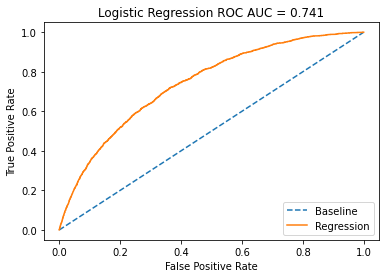

In [45]:
# We will use ROC analysis to define the quality of the model

lgr = LogisticRegression(penalty = 'l2', C=59.94842503189409, max_iter=500)
lgr.fit(X_train, y_train)

probs = lgr.predict_proba(X_test)
probs = probs[:,1]


fpr, tpr, threshold = roc_curve(y_test, probs)
roc_auc = roc_auc_score(y_test, probs)

plt.figure()
plt.plot([0, 1], label='Baseline', linestyle='--')
plt.plot(fpr, tpr, label = 'Regression')
plt.title('Logistic Regression ROC AUC = %0.3f' % roc_auc)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc = 'lower right')
plt.show()

In [46]:
# Checking other model quality parameters:

y_pred = lgr.predict(X_test)
print('accuracy score:', accuracy_score(y_test,y_pred))
print('precision score:', precision_score(y_test,y_pred))
print('recall score:',recall_score(y_test,y_pred))
print('f1 score:', f1_score(y_test,y_pred))

accuracy score: 0.8754065040650406
precision score: 0.4142857142857143
recall score: 0.015873015873015872
f1 score: 0.030574591460200317


INTERPRETATION:
we cannot really use *Accuracy* metric, because the dataset is imbalanced towards non-default clients, so we will focus on *F1 score* as the target metric. *F1 score* of 0.03 is not a very good result.

[Text(0.5, 0, 'Predicted'), Text(0, 0.5, 'True')]

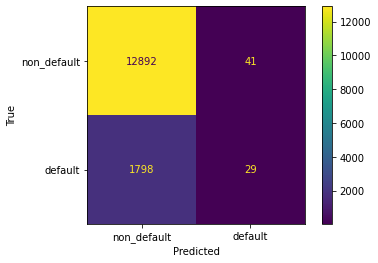

In [47]:
# Diving deeper into the confusion matrix:

cm = confusion_matrix(y_test, y_pred)
cmd = ConfusionMatrixDisplay(cm, display_labels=['non_default', 'default'])
cmd.plot()
cmd.ax_.set(xlabel='Predicted', ylabel='True')

INTERPRETATION: we see that Model Version 1 really assigns most of the clients to the non_default group, which is concerning, especially looking at how many true default clients were assigned non_default.

#### Version 2: reduced dataset (Z,W)

In [48]:
Z_train, Z_test, w_train, w_test = train_test_split(Z, W, test_size=0.20, random_state=42, shuffle = True)

In [49]:
# Adding hyperparameters

penalty = ['l1', 'l2']
C = np.logspace(0, 4, 10)


hyperparameters = dict(C=C, penalty=penalty)

model = LogisticRegression()
model.fit(Z_train, w_train)

clf = GridSearchCV(model, hyperparameters, cv=5, verbose=0)

best_model = clf.fit(Z_train, w_train)

print('Best penalty:', best_model.best_estimator_.get_params()['penalty'])
print('Best C:', best_model.best_estimator_.get_params()['C'])

Best penalty: l2
Best C: 3593.813663804626


In [50]:
lgr_reduced = LogisticRegression(penalty = 'l2', C=3593.813663804626, max_iter=500)
lgr_reduced.fit(Z_train, w_train)

LogisticRegression(C=3593.813663804626, max_iter=500)

#### Analyzing the model results:

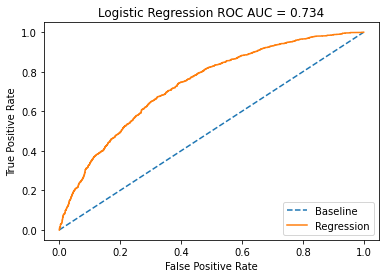

In [51]:
# We will use ROC analysis to define the quality of the model

probs_r = lgr_reduced.predict_proba(Z_test)
probs_r = probs_r[:,1]


fpr, tpr, threshold = roc_curve(w_test, probs_r)
roc_auc_r = roc_auc_score(w_test, probs_r)

plt.figure()
plt.plot([0, 1], label='Baseline', linestyle='--')
plt.plot(fpr, tpr, label = 'Regression')
plt.title('Logistic Regression ROC AUC = %0.3f' % roc_auc_r)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc = 'lower right')
plt.show()

In [52]:
# Checking other model quality parameters:

w_pred = lgr_reduced.predict(Z_test)
print('accuracy score:', accuracy_score(w_test,w_pred))
print('precision score:', precision_score(w_test,w_pred))
print('recall score:',recall_score(w_test,w_pred))
print('f1 score:', f1_score(w_test,w_pred))

accuracy score: 0.6729794611896506
precision score: 0.6745905969360803
recall score: 0.6767355590885002
f1 score: 0.6756613756613756


INTERPRETATION: ROC value got decreased, however Model Version 2 seems to deliver better results with higher F1 score of 0.67 compared to 0.03 of Model Version 1. Precision score got higher (from 0.41 to 0.67) as well as Recall score (from 0.01 to 0.67).



[Text(0.5, 0, 'Predicted'), Text(0, 0.5, 'True')]

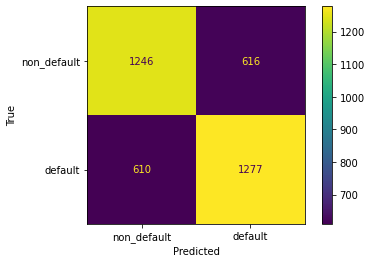

In [53]:
# Diving deeper into the confusion matrix:

cm_r = confusion_matrix(w_test, w_pred)
cmd_r = ConfusionMatrixDisplay(cm_r, display_labels=['non_default', 'default'])
cmd_r.plot()
cmd_r.ax_.set(xlabel='Predicted', ylabel='True')

INTERPRETATION: Model Version 2 has at least better distribution of default and non_default cases with most default cases being assigned to default and most non_default cases being assigned as such. However model is still making a lot of mistakes and has a considerable amount of not identified default customers, as well as falsely punished non_default customers. Possible next steps to adjust the model would be to test other approaches to balance the initial dataset.


### 6. Submission

In [54]:
lgr_reduced = LogisticRegression(penalty = 'l2', C=3593.813663804626, max_iter=500)
lgr_reduced.fit(Z,W)
probs_final = lgr_reduced.predict_proba(test)
probs_final = probs_final[:,1]

In [55]:
submission = pd.DataFrame({'client_id': id_test, 
                            'default': probs_final})
submission.to_csv('submission.csv', index=False)

submission

,client_id,default
0,74835,0.234714
1,17527,0.860585
2,75683,0.378662
3,26883,0.363454
4,28862,0.116670
...,...,...
36344,83775,0.856943
36345,106254,0.130694
36346,81852,0.838476
36347,1971,0.664542
